# Author: M.Sc. Ricardo Licona

In [1]:
from gamma.utils import Gamma
import pandas as pd
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

## We are taking to the dataset from the UCI Machine Learning Repository.

In [2]:
import pandas as pd 

X = Gamma().read_dataset(website='UCI_Machine_Learning_Repository', dataset='iris')

In [3]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## There are three classes in the Iris dataset. 

In [4]:
X['class'].nunique()

3

In [5]:
X['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

## We are going to change classes. It is more practice.  

In [6]:
X.loc[X['class'] == 'Iris-setosa', 'class'] = 1
X.loc[X['class'] == 'Iris-versicolor', 'class'] = 2
X.loc[X['class'] == 'Iris-virginica', 'class'] = 3

In [7]:
X['class'].unique()

array([1, 2, 3])

# 'X' will contain the data and 'y' the labels of all the dataset.

In [8]:
X, y = Gamma().separate_data_and_labels(X)

# Basic Exploratory Data Analysis (EDA).

In [9]:
Gamma().generate_descriptive_statistics(X)

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


'Done'

## Are there missing values?

In [10]:
Gamma().detect_missing_values(X, y)

Missing X data?  False
Missing y Label?  False


'Done'

## How many patterns do we have?

In [11]:
Gamma().total_patterns(X)

Total patterns:  150


'Done'

## How many patterns by each class do we have?

In [12]:
%matplotlib inline
class1_n, class2_n, class3_n = Gamma().get_patterns_by_class(y, X)

## Logarithmic scale (Pre-processing stept for Gamma)

In [13]:
X = Gamma.logarithmic_scale(X, exponent=0)

In [14]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,51,35,14,2
1,49,30,14,2
2,47,32,13,2
3,46,31,15,2
4,50,36,14,2


## Feature correlation

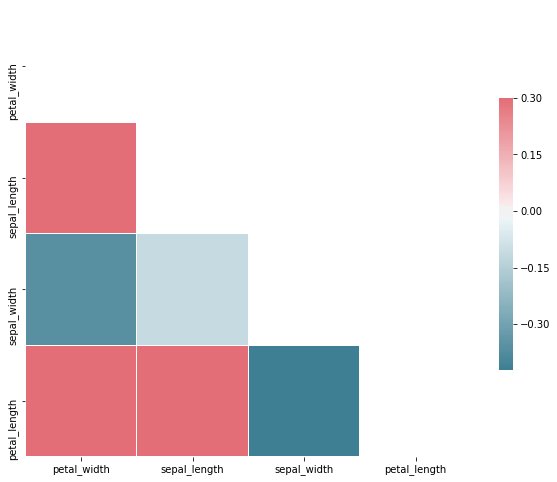

'Done'

In [15]:
%matplotlib inline
Gamma().feature_correlation(X)

# Hold-Out Stratified

In [16]:
X_train, X_valid, y_train, y_valid = Gamma().hold_out_stratified(X, y, train_size=0.7, test_size=0.3)

## Train elements

In [17]:
%matplotlib inline
patterns_c1, patterns_c2, patterns_c3 = Gamma().get_patterns_by_class(y_train, X_train)

## Test elements

In [18]:
%matplotlib inline
test_class_1, test_class_2, test_class_3 = Gamma().get_patterns_by_class(y_valid, X_valid)

Total elements of Class 1: 35
Total elements of Class 2: 35
Total elements of Class 3: 35
Total:  105


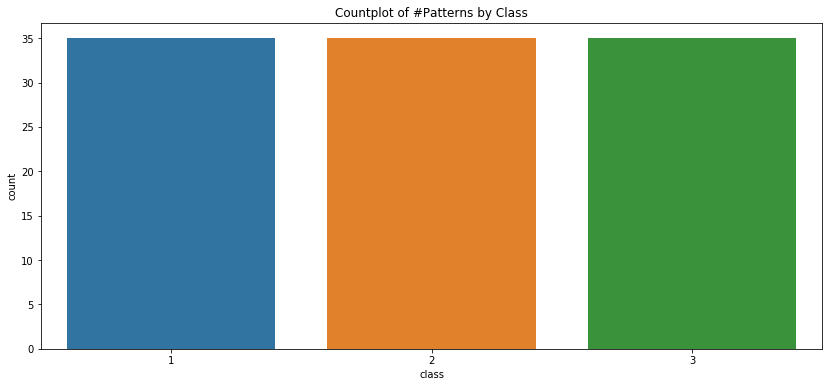

In [19]:
class1_n, class2_n, class3_n = Gamma().get_number_of_patterns_by_class(y_train)

# Clasification

In [20]:
train_patterns, X_test, number_of_patterns = Gamma().prepare_data(class1_n,
                                                        patterns_c1,  
                                                        class2_n, 
                                                        patterns_c2,
                                                        class3_n, 
                                                        patterns_c3,
                                                        X_valid, 
                                                        y_valid)

data  = {'X_test':X_test,'train_patterns':train_patterns, 'number_of_patterns':number_of_patterns, 'theta':5}    #the keyword argument container

acc, preds = Gamma().predict(**data)                     #calling the function

## Confusion matrix

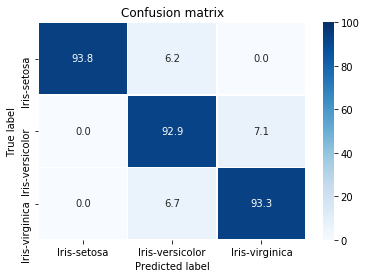

In [21]:
names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
Gamma().plot_confusion_matrix(preds, y_valid, names)

In [22]:
print("Gamma Accuracy: ", acc)

Gamma Accuracy:  93.33333333333333


## Mean Absolute Error

In [23]:
Gamma().mean_absolute_error(preds, y_valid)

GMean Asbolute Error:  0.06666666666666667


'Done'